<a href="https://colab.research.google.com/github/Hamza1122/Assignment_ML/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing relevant libraries**

In [1]:
!git clone https://github.com/mmbejani/keras-regularization

Cloning into 'keras-regularization'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 111 (delta 36), reused 48 (delta 10), pack-reused 0
Receiving objects: 100% (111/111), 28.57 KiB | 835.00 KiB/s, done.
Resolving deltas: 100% (36/36), done.


In [2]:
cd /content/keras-regularization

/content/keras-regularization


In [ ]:
!python setup.py install 

In [4]:
cd ..

/content


In [153]:
import statsmodels.api as sm
import pandas as pd  
import numpy as np
from patsy import dmatrices
import keras
# from keras_drop_connect import DropConnect

from keras.models import Sequential
from keras.layers import Flatten

# #from google.colab import drive
# #drive.mount('/content/drive')
# from google.colab import files
# uploaded = files.upload()


**Importing my data**

In [154]:
# loading the training dataset  
df = pd.read_csv('filtered.csv') 
df = df.replace({np.nan:-1})
df.head()

,Site,EXAMbySANE,YearKitCollected,KITbroughtTOcrimelab,KITlengthofSubmissionTime,Age,UnderAge18,Gender,ExamDeclined,Noninterview,Timebetweenassaultandexaminhours,Race,Raceother,PriorHxofSAover14,PriorHxofSAunder14,Student,SchoolName,Military,MilitaryBranchName,Pain,PainLevel,PainLocation1,PainLocation2,PainLocation3,PainLocation4,PainTreatment,PermanentAddress,AddressIfnotPermanent,CurrentPhysicalmedprob,Currentmedprobtext,MedProbChronic,MedProbInfection,MedProbBlood,MedProbCardiac,MedProbEar,MedProbEndocrine,MedProbEye,MedProbGI,MedProbGU,MedProbGYN,...,LGIglanspenis,LGIpenileshaft,LGImaleURETHRALmeatus,LGIscrotum,LGItestes,LGImaleanus,LGImalerectum,TGIlaceration,TGIecchymosis,TGIabrasion,TGIredness,TGIswelling,TGIbruise,TGIpetechiae,TGIincision,TGIavulsion,TGIdiscoloredmark,TGIpuncturewound,ToludineDYEuptake,HIVnPEP,Yscreen,NumberOFitemsTested,NumberItemsWITH3cutoff,ItemsAnalyzed1,ItemsAnalyzed2,ItemsAnalyzed3,ItemsAnalyzed4,ItemsAnalyzed5,ItemsAnalyzed6,ItemsAnalyzed7,ItemsAnalyzed8,ItemsAnalyzed9,ItemsAnalyzed10,TypesOFitemsTested,TimeBetweenCollectAndDNAext,TimeBetweenSubmissionANDtesting,NumberOfswabsDNAanalysis,SuspectStandardSubmitted,ConsensualPartnerStandardSubmitted,CODISNDISeligibleProfile
0,1,1,2,1,2,20-24,0,1,0,,0-5.9,1,,,,,,,,,,,,,,,,,1,Heartburn and pain in LLQ abdomen,1,0,0,0,0,0,0,1,0,0,...,3,3,3,3,3,3,3,1,0,1,1,1,0,0,0,0,0,0,1,0,,11,2,1,2,3,4,6,8,11,,,,3,12,5,9,1,0,1
1,4,1,6,1,1,14-17,1,1,0,0,12-23.9,1,,,,,,,,,,,,,,,,,0,,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,17,2,1,2,3,5,8,9,10,11,,,5,9,8,7,1,0,1
2,1,1,8,1,1,30-39,0,1,0,0,0-5.9,3,,0,0,0,,0,,1,,1,2,5,,1,1,,1,pt has small uterus and never got her menstrua...,0,0,0,0,0,0,0,0,0,1,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,7,2,7,8,9,10,,,,,,,2,13,13,7,0,0,0
3,1,1,4,1,1,20-24,0,1,0,0,12-23.9,1,,0,1,,,,,,,,,,,,,,1,"Anemia, Asthma",1,0,1,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,1,1,0,0,0,0,0,0,0,0,1,0,,14,2,1,2,3,4,5,6,8,9,11,12,5,12,12,6,1,0,1
4,1,1,5,1,2,14-17,0,1,0,0,24-47.9,7,,0,0,,,,,,,,,,,,,,0,,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,,12,2,1,2,3,4,5,6,8,11,,,3,10,6,6,1,0,1


In [155]:
for col in df.columns: 
    print(col)

Site
EXAMbySANE
YearKitCollected
KITbroughtTOcrimelab
KITlengthofSubmissionTime
Age
UnderAge18
Gender
ExamDeclined
Noninterview
Timebetweenassaultandexaminhours
Race
Raceother
PriorHxofSAover14
PriorHxofSAunder14
Student
SchoolName
Military
MilitaryBranchName
Pain
PainLevel
PainLocation1
PainLocation2
PainLocation3
PainLocation4
PainTreatment
PermanentAddress
AddressIfnotPermanent
CurrentPhysicalmedprob
Currentmedprobtext
MedProbChronic
MedProbInfection
MedProbBlood
MedProbCardiac
MedProbEar
MedProbEndocrine
MedProbEye
MedProbGI
MedProbGU
MedProbGYN
MedProbImmune
MedProbMusculoskeletal
MedProbNeurological
MedProbOral
MedProbRenal
MedProbRespiratory
MedProbSkin
MedProbOther
MedProbOtherText
Medication
Medicationtext
PsychotropicMEDuse
PsychotropicSTIMULANTuse
PsychotropicANTIPSYCHOTICSatypical
PsychotropicANTIPSYCHOTICStypical
PsychotropicANTIANXIETY
PsychotropicANTIDEPRESSANTS
PsychotropicANTISEIZUREbipolar
PsychotropicADDICTIONmeds
PsychotropicSLEEPaid
PsychotropicOTHER
PolypharmacyPs

In [156]:
df[['CODISNDISeligibleProfile', 'Age']]

,CODISNDISeligibleProfile,Age
0,1,20-24
1,1,14-17
2,0,30-39
3,1,20-24
4,1,14-17
...,...,...
2234,1,20-24
2235,1,14-17
2236,1,20-24
2237,1,25-29


**Examine and Clean variables for use**

In [157]:
df = df.apply(pd.to_numeric, errors='ignore')

In [158]:
df

,Site,EXAMbySANE,YearKitCollected,KITbroughtTOcrimelab,KITlengthofSubmissionTime,Age,UnderAge18,Gender,ExamDeclined,Noninterview,Timebetweenassaultandexaminhours,Race,Raceother,PriorHxofSAover14,PriorHxofSAunder14,Student,SchoolName,Military,MilitaryBranchName,Pain,PainLevel,PainLocation1,PainLocation2,PainLocation3,PainLocation4,PainTreatment,PermanentAddress,AddressIfnotPermanent,CurrentPhysicalmedprob,Currentmedprobtext,MedProbChronic,MedProbInfection,MedProbBlood,MedProbCardiac,MedProbEar,MedProbEndocrine,MedProbEye,MedProbGI,MedProbGU,MedProbGYN,...,LGIglanspenis,LGIpenileshaft,LGImaleURETHRALmeatus,LGIscrotum,LGItestes,LGImaleanus,LGImalerectum,TGIlaceration,TGIecchymosis,TGIabrasion,TGIredness,TGIswelling,TGIbruise,TGIpetechiae,TGIincision,TGIavulsion,TGIdiscoloredmark,TGIpuncturewound,ToludineDYEuptake,HIVnPEP,Yscreen,NumberOFitemsTested,NumberItemsWITH3cutoff,ItemsAnalyzed1,ItemsAnalyzed2,ItemsAnalyzed3,ItemsAnalyzed4,ItemsAnalyzed5,ItemsAnalyzed6,ItemsAnalyzed7,ItemsAnalyzed8,ItemsAnalyzed9,ItemsAnalyzed10,TypesOFitemsTested,TimeBetweenCollectAndDNAext,TimeBetweenSubmissionANDtesting,NumberOfswabsDNAanalysis,SuspectStandardSubmitted,ConsensualPartnerStandardSubmitted,CODISNDISeligibleProfile
0,1,1,2,1,2,20-24,0,1,0,,0-5.9,1,,,,,,,,,,,,,,,,,1,Heartburn and pain in LLQ abdomen,1,0,0,0,0,0,0,1,0,0,...,3,3,3,3,3,3,3,1,0,1,1,1,0,0,0,0,0,0,1,0,,11,2,1,2,3,4,6,8,11,,,,3,12,5,9,1,0,1
1,4,1,6,1,1,14-17,1,1,0,0,12-23.9,1,,,,,,,,,,,,,,,,,0,,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,17,2,1,2,3,5,8,9,10,11,,,5,9,8,7,1,0,1
2,1,1,8,1,1,30-39,0,1,0,0,0-5.9,3,,0,0,0,,0,,1,,1,2,5,,1,1,,1,pt has small uterus and never got her menstrua...,0,0,0,0,0,0,0,0,0,1,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,7,2,7,8,9,10,,,,,,,2,13,13,7,0,0,0
3,1,1,4,1,1,20-24,0,1,0,0,12-23.9,1,,0,1,,,,,,,,,,,,,,1,"Anemia, Asthma",1,0,1,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,1,1,0,0,0,0,0,0,0,0,1,0,,14,2,1,2,3,4,5,6,8,9,11,12,5,12,12,6,1,0,1
4,1,1,5,1,2,14-17,0,1,0,0,24-47.9,7,,0,0,,,,,,,,,,,,,,0,,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,,12,2,1,2,3,4,5,6,8,11,,,3,10,6,6,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,5,0,7,1,2,20-24,0,1,0,0,48+,1,,,,,,,,,,,,,,,,,1,ovarian cancer peridarditits,0,0,0,1,0,0,0,0,0,1,...,3,3,3,3,3,3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,,3,1,2,3,4,,,,,,,,1,38,31,1,0,0,1
2235,5,0,7,1,2,14-17,1,1,0,0,12-23.9,1,,,,,,,,,,,,,,,,,0,"depresion, anxiety, bipolar",0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,1,0,,3,1,1,3,7,,,,,,,,1,22,21,1,0,0,1
2236,5,0,7,1,1,20-24,0,1,0,0,24-47.9,3,,,,,,,,1,0,6,4,2,7,,,,0,"depression, anxiety, Hep C",1,1,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,1,,3,1,1,3,4,,,,,,,,1,27,27,1,0,0,1
2237,5,0,8,1,2,25-29,0,1,0,0,12-23.9,1,,,,,,,,0,,,,,,,,,1,"TBI, anxiety, sinus infection",1,1,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,,2,1,1,3,,,,,,,,,1,45,28,1,0,0,1


In [159]:
df = df.astype({'Site': int, 'EXAMbySANE': int, 'YearKitCollected': int, 'KITbroughtTOcrimelab': int, 'KITlengthofSubmissionTime': int, 'Age': str, 'UnderAge18': int, 'Gender': int, 'ExamDeclined': int, 'Noninterview': int, 'Timebetweenassaultandexaminhours': str, 'Race': int, 'Raceother': int, 'PriorHxofSAover14': bool, 'PriorHxofSAunder14': bool, 'Student': bool, 'SchoolName': str, 'Military': bool, 'MilitaryBranchName': str, 'Pain': bool, 'PainLevel': int, 'PainLocation1': int, 'PainLocation2': int, 'PainLocation3': int, 'PainLocation4': int, 'PainTreatment': bool}, errors='ignore') 

In [160]:
counts = df['Gender'].value_counts()

In [161]:
counts

1    2056
2     164
3      13
4       3
5       2
        1
Name: Gender, dtype: int64

In [162]:
#df = df.astype({'PermanentAddress': bool, 'AddressIfnotPermanent': str, 'CurrentPhysicalmedprob': bool, 'Currentmedprobtext': str, 'MedProbChronic': bool, 'MedProbInfection': bool, 'MedProbBlood': bool, 'MedProbCardiac': bool, 'MedProbEar': bool, 'MedProbEndocrine': bool, 'MedProbEye': bool, 'MedProbGI': bool, 'MedProbGU': bool, 'MedProbGYN': bool}, errors='ignore')

In [163]:
#df = df.astype({'CODISNDISeligibleProfile': int}, errors='ignore')

In [164]:
df['Age_cat'] = df['Age'].astype('category')

In [165]:
df['Age_cat']

0       20-24
1       14-17
2       30-39
3       20-24
4       14-17
        ...  
2234    20-24
2235    14-17
2236    20-24
2237    25-29
2238    18-19
Name: Age_cat, Length: 2239, dtype: category
Categories (7, object): [' ', '14-17', '18-19', '20-24', '25-29', '30-39', '40+']

In [166]:
df['SchoolName_cat'] = df['SchoolName'].astype('category')

In [167]:
df['SchoolName_cat']

0        
1        
2        
3        
4        
       ..
2234     
2235     
2236     
2237     
2238     
Name: SchoolName_cat, Length: 2239, dtype: category
Categories (40, object): [' ', 'ATech (Technical school for mentally disabled)',
                          'Acadia Asthetics School', 'American military university', ...,
                          'Weber State University', 'Westminister', 'Westminster', 'fortis college']

In [168]:
df['MilitaryBranchName_cat'] = df['MilitaryBranchName'].astype('category')

In [169]:
df['Timebetweenassaultandexaminehours_cat'] = df['Timebetweenassaultandexaminhours'].astype('category')

In [170]:
df['Timebetweenassaultandexaminehours_cat']

0         0-5.9
1       12-23.9
2         0-5.9
3       12-23.9
4       24-47.9
         ...   
2234        48+
2235    12-23.9
2236    24-47.9
2237    12-23.9
2238        48+
Name: Timebetweenassaultandexaminehours_cat, Length: 2239, dtype: category
Categories (6, object): [' ', '0-5.9', '12-23.9', '24-47.9', '48+', '6-11.9']

In [171]:
df['Race_cat'] = df['Race'].astype('category') 

In [172]:
df['Race_cat']

0       1
1       1
2       3
3       1
4       7
       ..
2234    1
2235    1
2236    3
2237    1
2238    1
Name: Race_cat, Length: 2239, dtype: category
Categories (8, object): [' ', '1', '2', '3', '4', '5', '6', '7']

In [173]:
df1= df.copy()

**Run some models**

Simple logistic models

In [174]:
# first running a simple logistic regression
y, X = dmatrices('CODISNDISeligibleProfile ~ Gender + Age_cat + EXAMbySANE + YearKitCollected + KITbroughtTOcrimelab + Race_cat', data=df, return_type='dataframe')




In [175]:
# mod = sm.Logit(y, X)    # Describe model
# res = mod.fit(X)       # Fit model
# print(res.summary())

In [176]:
from sklearn import preprocessing


In [177]:
y=df1['CODISNDISeligibleProfile']
X=df1.drop(['CODISNDISeligibleProfile'],axis=1)



#**Run diagnostics on the data**
1. confirm that each variable is numerical or categorical and available for analysis; 
2. perform a histogram for all variables; 
3. perform a correlation matrix and covariance matrix (or in the upper and lower triangle of the same matrix).
4. Scatter-plot matrix of the top 10 variables that correlate with the CODISNDISeligibleProfile variable

**1. confirm that each variable is numerical or categorical and available for analysis;**

In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Columns: 258 entries, Site to Race_cat
dtypes: bool(6), category(5), int64(11), object(236)
memory usage: 4.2+ MB


In [179]:
df1=df1.drop(['Noninterview','Timebetweenassaultandexaminhours','PainLocation1','PainLocation2','PainLocation3','PainLocation4',
              'Currentmedprobtext'],axis=1)
df1=df1.drop(['PermanentAddress','AddressIfnotPermanent','PainLevel'],axis=1)

le = preprocessing.LabelEncoder()
df1['ExamDeclined']=le.fit_transform(df1['ExamDeclined'])
df1['PriorHxofSAover14']=le.fit_transform(df1['PriorHxofSAover14'])
df1['PriorHxofSAunder14']=le.fit_transform(df1['PriorHxofSAunder14'])
df1['PainTreatment']=le.fit_transform(df1['PainTreatment'])
df1['Student']=le.fit_transform(df1['Student'])
df1['Military']=le.fit_transform(df1['Military'])
df1['Pain']=le.fit_transform(df1['Pain'])
df1['Age_cat']=le.fit_transform(df1['Age_cat'])
df1['Age']=le.fit_transform(df1['Age'])
df1['Timebetweenassaultandexaminehours_cat']=le.fit_transform(df1['Timebetweenassaultandexaminehours_cat'])
df1['Site']=le.fit_transform(df1['Site'])
df1['SchoolName_cat']=le.fit_transform(df1['SchoolName_cat'])
df1['MilitaryBranchName_cat']=le.fit_transform(df1['MilitaryBranchName_cat'])


df1['KITlengthofSubmissionTime']=le.fit_transform(df1['KITlengthofSubmissionTime'])                     

In [180]:
df1['Timebetweenassaultandexaminehours_cat']=df1['Timebetweenassaultandexaminehours_cat'].astype(int)
df1['MilitaryBranchName_cat']=df1['MilitaryBranchName_cat'].astype(int)

In [181]:
df1= df1.drop(['Race_cat'],axis=1)

In [182]:
df1=df1.fillna(df1.mean())

In [204]:
y=df1['CODISNDISeligibleProfile']
X=df1.drop(['CODISNDISeligibleProfile'],axis=1)
X= X.select_dtypes(exclude=['object'])



**2. perform a histogram for all variables;**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febc49489e8>,
      dtype=object)

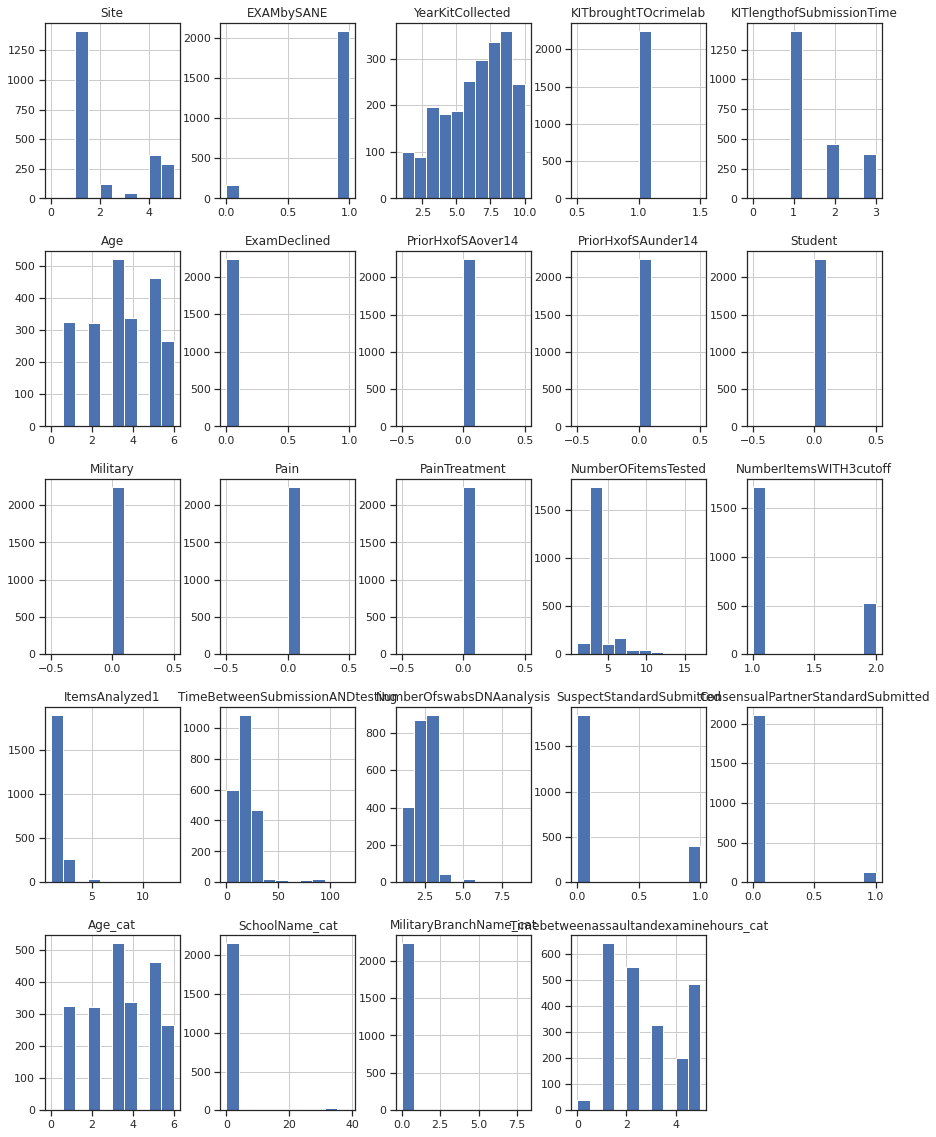

In [205]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X.hist(ax = ax)


In [206]:
df=X.drop(['Student','Student','PainTreatment','Pain','PriorHxofSAunder14','PriorHxofSAover14','Military','KITbroughtTOcrimelab'],axis=1)

In [207]:
df.dtypes

Site                                     int64
EXAMbySANE                               int64
YearKitCollected                         int64
KITlengthofSubmissionTime                int64
Age                                      int64
ExamDeclined                             int64
NumberOFitemsTested                      int64
NumberItemsWITH3cutoff                   int64
ItemsAnalyzed1                           int64
TimeBetweenSubmissionANDtesting          int64
NumberOfswabsDNAanalysis                 int64
SuspectStandardSubmitted                 int64
ConsensualPartnerStandardSubmitted       int64
Age_cat                                  int64
SchoolName_cat                           int64
MilitaryBranchName_cat                   int64
Timebetweenassaultandexaminehours_cat    int64
dtype: object

**3. perform a correlation matrix and covariance matrix (or in the upper and lower triangle of the same matrix).**

**Correlation Matrix**

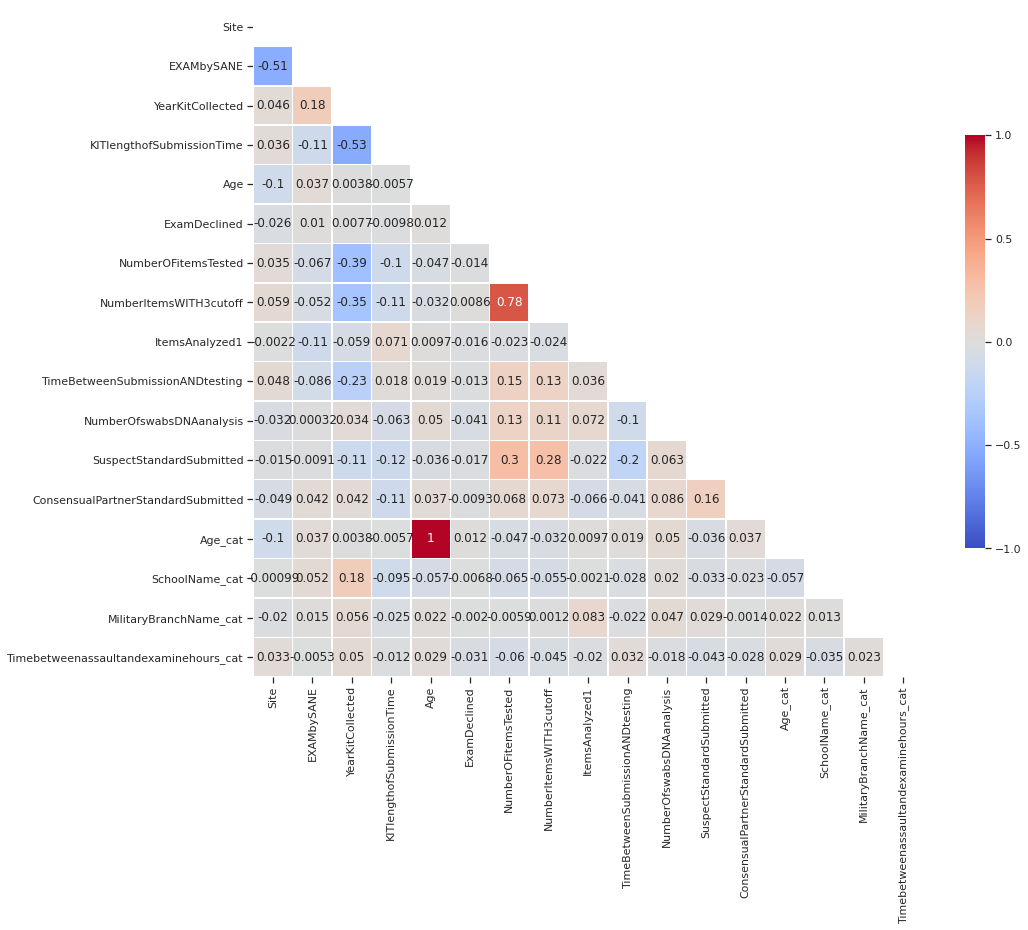

In [208]:
import numpy as np
import seaborn as sns

corr_matrix = df.corr()

df_dummy = pd.get_dummies(df.dtypes)
df = pd.concat([df, df_dummy], axis = 1)
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 19)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

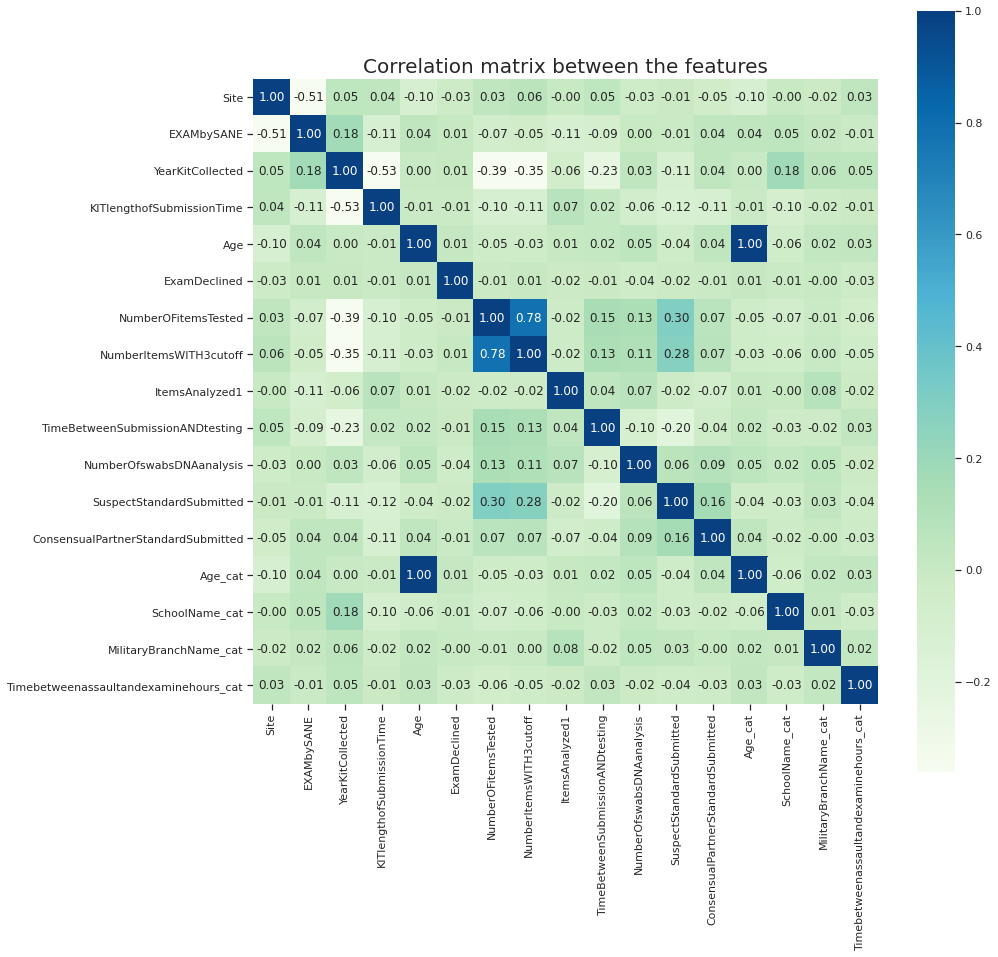

In [209]:
temp=X.drop(['Student','Student','PainTreatment','Pain','PriorHxofSAunder14','PriorHxofSAover14','Military','KITbroughtTOcrimelab'],axis=1)
plt.figure(figsize=(14,14))
ax = sns.heatmap(temp.corr(), vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()

**4.Scatter-plot matrix of the top 10 variables that correlate with the CODISNDISeligibleProfile variable**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:3

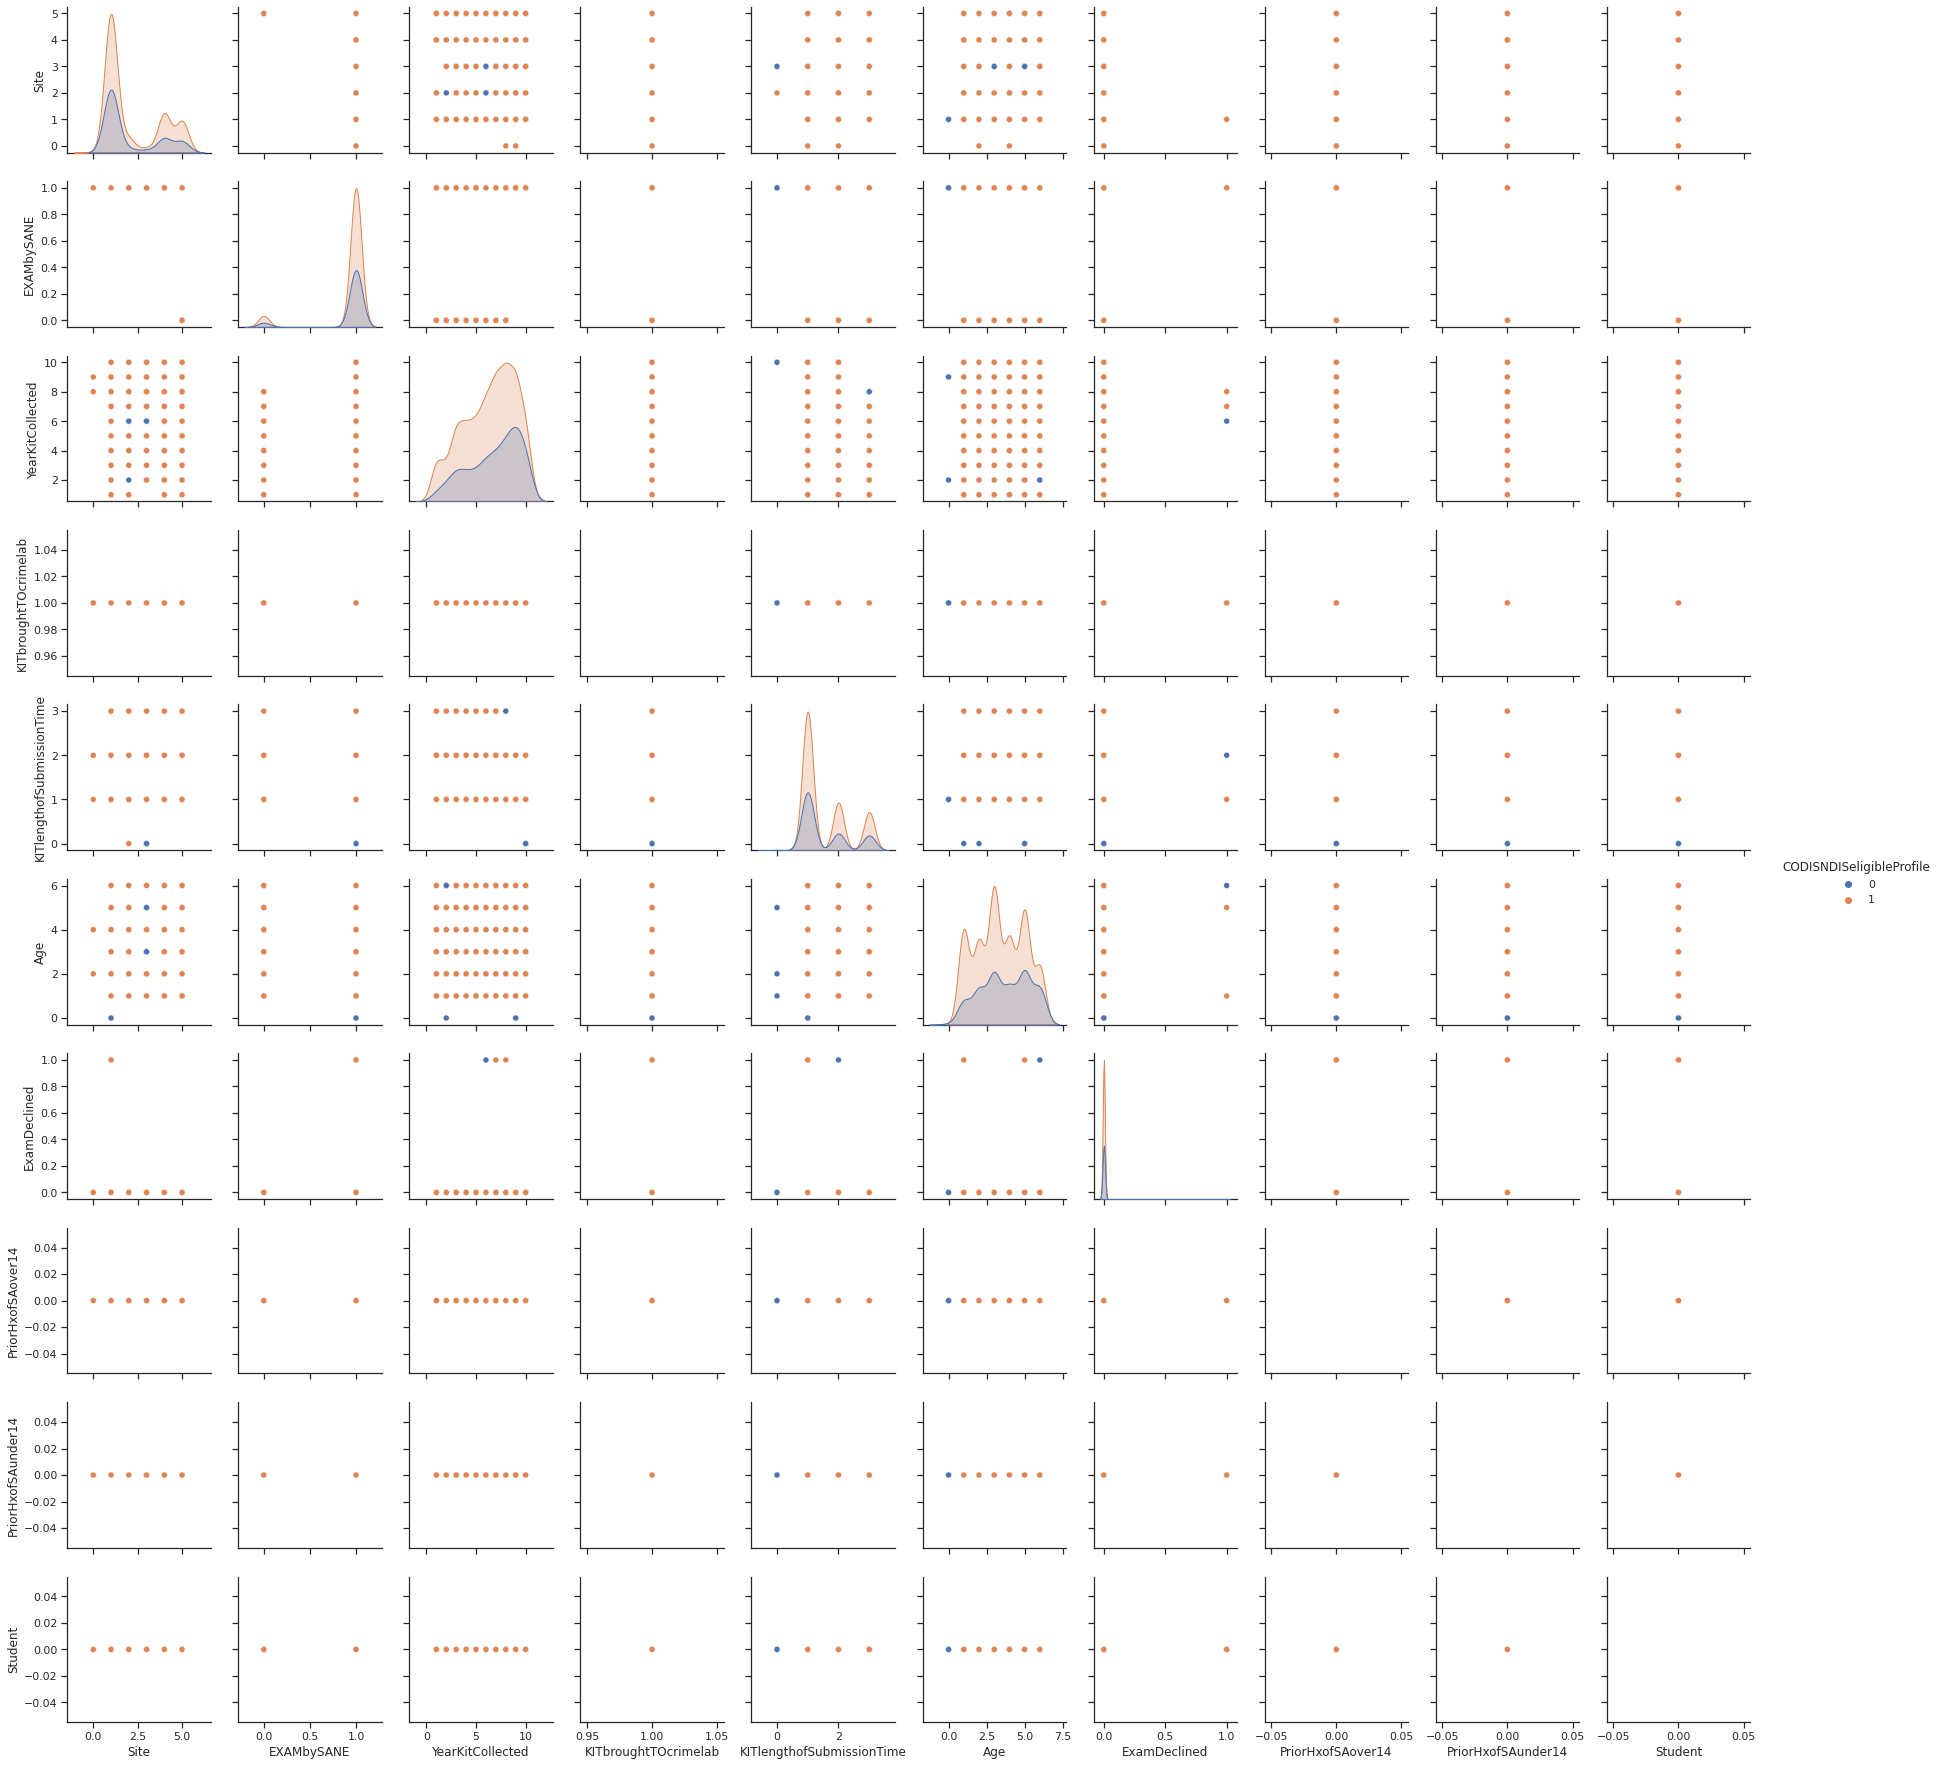

In [198]:
sns.set_theme(style="ticks")
temp=X.iloc[:,0:10]
temp['CODISNDISeligibleProfile']=y
sns.pairplot(temp, hue="CODISNDISeligibleProfile")

# **Run simple diagnostic models of the data**
Focal Variable: CODISNDISeligibleProfile

1. Logistic regression (e.g., SciKitLearn or StatsModels) with 10-fold cross-validation
2. Logistic regression with L1 regularization (e.g., dropping all but the most significant variables).







In [199]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [202]:
X.dtypes

Site                                     int64
EXAMbySANE                               int64
YearKitCollected                         int64
KITbroughtTOcrimelab                     int64
KITlengthofSubmissionTime                int64
Age                                      int64
ExamDeclined                             int64
PriorHxofSAover14                        int64
PriorHxofSAunder14                       int64
Student                                  int64
Military                                 int64
Pain                                     int64
PainTreatment                            int64
NumberOFitemsTested                      int64
NumberItemsWITH3cutoff                   int64
ItemsAnalyzed1                           int64
TimeBetweenSubmissionANDtesting          int64
NumberOfswabsDNAanalysis                 int64
SuspectStandardSubmitted                 int64
ConsensualPartnerStandardSubmitted       int64
Age_cat                                  int64
SchoolName_ca

**1. Logistic regression (e.g., SciKitLearn or StatsModels) with 10-fold cross-validation**

In [203]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LogisticRegression()


scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.2f%%" % (scores.mean()*100.0))

Accuracy: 71.10%


**2. Logistic regression with L1 regularization (e.g., dropping all but the most significant variables).**

In [210]:
model = LogisticRegression(penalty='l1', solver='liblinear')


scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Accuracy: %.2f%%" % (scores.mean()*100.0))

Accuracy: 70.97%


# **Run neural networks with a variety of settings to achieve lowest loss on hold-out data**

1. Run a series of two-layer hidden layer models with 100 hidden variables per layer with a final sigmoid activation function predicting CODISNDISeligibleProfile with a Cross-Entropy Loss but varying each of the following (3X3 = 9 models)
  1. with activations between the hidden layers that are:
    1. Linear 
    2. ReLU
    3. Sigmoid 
  2. Using the following optimizations:
    1. Simple back-propagation
    2. Momentum
    3. ADAM
    4. Newton's method 
2. Pick the BEST model based on the lowest Cross-Entropy Loss. [My prediction is that it will be ReLU, ADAM], then re-run, but varying the following (10+10 = 20 models):
  1. Number of hidden layers: 
    1. 1-10 added sequentially with "DropIn": https://arxiv.org/abs/1511.06951)*
    2. 1-10 layers holding the total number of hidden variables constant (e.g., 1-layer with 100 hidden variables; 2-layer with 50 in each of 2 layers; 3-layer with 34, 33, and 33 in each of 3 years...; 10-layer with 10 in each of 10 layers)
3. Pick the BEST model based on lowest Cross-Entropy Loss, then rerun with those layers, but varying the following (4 * 3 = 12 models)
  1. Regularization:
    1. DropOut*
    2. DropConnect
    3. ShakeOut (https://arxiv.org/pdf/1904.06593.pdf)
    4. StandOut (https://papers.nips.cc/paper/2013/file/7b5b23f4aadf9513306bcd59afb6e4c9-Paper.pdf)
  2. Early stopping (after 2, 5 & 10 training epochs)
4. Pick the BEST model and describe in detail 

In [211]:
from sklearn.model_selection import train_test_split

**HoldOut Method**

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [213]:
cd /content/keras-regularization

/content/keras-regularization


**Neural Network**


In [214]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dense
from keras.layers import Dropout
from regularization.layers.shakeout import ShakeoutConv2D, ShakeoutDense

def neural_network_model(activation,optimizer):
  model = Sequential()
  model.add(Dense(100, input_dim=24, activation=activation))
  model.add(Dense(100, activation=activation))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


import matplotlib.pyplot as plt


def neural_network_model_with_ten_layers(activation,optimizer):
  model = Sequential()
  model.add(Dense(100,input_dim=24,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(50,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(50,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(34,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation=activation))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model  




def shakeout_method(activation,optimizer):
  model = Sequential()

  model.add(Dense(100,input_dim=24,activation=activation))
  model.add(ShakeoutDense(units=100,c=0.1,tau=0.1,activation=activation))
  
  model.add(ShakeoutDense(units=100,c=0.1,tau=0.1,activation=activation))
  
  model.add(ShakeoutDense(units=50,c=0.1,tau=0.1,activation=activation))
  
  model.add(ShakeoutDense(units=34,c=0.1,tau=0.1,activation=activation))
  
  model.add(ShakeoutDense(units=33,c=0.1,tau=0.1,activation=activation))
  
  model.add(ShakeoutDense(units=33,c=0.1,tau=0.1,activation=activation))
  
  model.add(ShakeoutDense(units=33,c=0.1,tau=0.1,activation=activation))
  
  model.add(ShakeoutDense(units=10,c=0.1,tau=0.1,activation=activation))
  
  model.add(ShakeoutDense(units=10,c=0.1,tau=0.1,activation=activation))
  
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  
  return model 





def best_model_extended(activation,optimizer):
  model = Sequential()
  model.add(Dense(100,input_dim=24,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(50,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(50,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(34,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(33,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(10,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(10,activation=activation))
  model.add(Dropout(0.2))
  
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  
  return model 





def loss_and_accuracy_graph(history):

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  return plt.show()





  

**PART 1**

Run a series of two-layer hidden layer models with 100 hidden variables per layer with a final sigmoid activation function predicting CODISNDISeligibleProfile with a Cross-Entropy Loss but varying each of the following (3X3 = 9 models)

**Linear + Adam**

In [215]:
linear_activation='linear'
relu_activation='relu'
sigmoid_activation='sigmoid'

adam_optimizer='adam'
sgd_optimizer = SGD(lr=0.01, momentum=0.9)


In [216]:
model=neural_network_model(linear_activation, adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 7ms/step - loss: 1.1729 - accuracy: 0.5351 - val_loss: 0.6488 - val_accuracy: 0.7037
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.6795 - val_loss: 0.6299 - val_accuracy: 0.6834
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.7132 - val_loss: 0.6831 - val_accuracy: 0.7023
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6305 - accuracy: 0.6641 - val_loss: 0.6751 - val_accuracy: 0.6834
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.6737 - val_loss: 0.6357 - val_accuracy: 0.6834
Epoch 6/50
47/47 [==============================] - 1s 12ms/step - loss: 0.5978 - accuracy: 0.6874 - val_loss: 0.6965 - val_accuracy: 0.5710
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7226 - val_loss: 0.7447 - val_accuracy: 0.5277
Epoch 8/50
47/47 [=

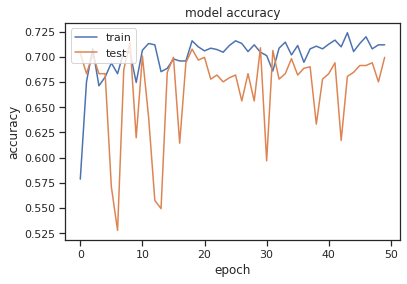

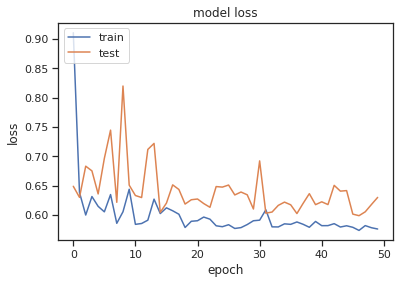

In [217]:
loss_and_accuracy_graph(history)

**Linear + Sgd (momentum)**

In [218]:
model=neural_network_model(linear_activation,sgd_optimizer)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 2.4828 - accuracy: 0.5805 - val_loss: 0.6667 - val_accuracy: 0.6590
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6781 - val_loss: 0.6470 - val_accuracy: 0.6752
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6130 - accuracy: 0.6940 - val_loss: 0.6458 - val_accuracy: 0.6360
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6943 - val_loss: 0.6307 - val_accuracy: 0.6942
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7005 - val_loss: 0.6412 - val_accuracy: 0.6238
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5956 - accuracy: 0.7077 - val_loss: 0.6300 - val_accuracy: 0.7077
Epoch 7/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.6998 - val_loss: 0.6554 - val_accuracy: 0.7064
Epoch 8/50
47/47 [==

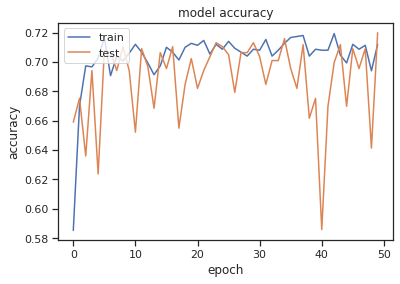

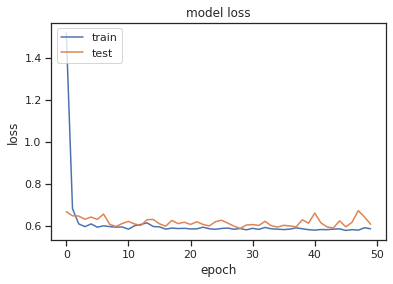

In [219]:
loss_and_accuracy_graph(history)

**ReLu + Adam**


In [220]:
model=neural_network_model(relu_activation, adam_optimizer)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 0.6824 - accuracy: 0.6117 - val_loss: 0.6293 - val_accuracy: 0.6834
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.6835 - val_loss: 0.6159 - val_accuracy: 0.6806
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.7021 - val_loss: 0.6392 - val_accuracy: 0.6211
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.6584 - val_loss: 0.6109 - val_accuracy: 0.7037
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.7265 - val_loss: 0.6069 - val_accuracy: 0.6955
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5588 - accuracy: 0.7281 - val_loss: 0.6163 - val_accuracy: 0.7037
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.6825 - val_loss: 0.6108 - val_accuracy: 0.6996
Epoch 8/50
47/47 [==

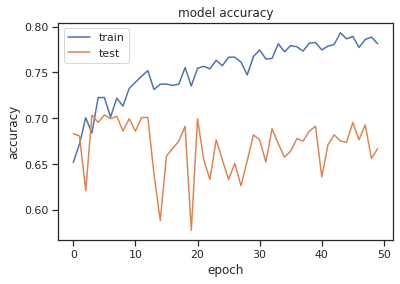

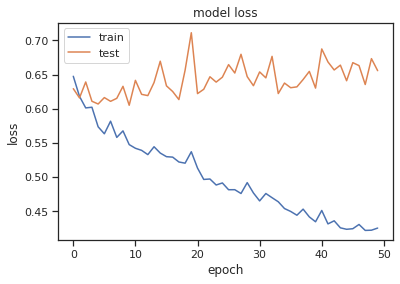

In [221]:
loss_and_accuracy_graph(history)

**Relu + Momentum**

In [222]:
model=neural_network_model(relu_activation,sgd_optimizer)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 0.7035 - accuracy: 0.6232 - val_loss: 0.7070 - val_accuracy: 0.5250
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6546 - val_loss: 0.6178 - val_accuracy: 0.6820
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.6854 - val_loss: 0.6163 - val_accuracy: 0.6996
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7093 - val_loss: 0.6081 - val_accuracy: 0.6888
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.6975 - val_loss: 0.6347 - val_accuracy: 0.7077
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7076 - val_loss: 0.6468 - val_accuracy: 0.6901
Epoch 7/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7156 - val_loss: 0.6005 - val_accuracy: 0.7037
Epoch 8/50
47/47 [==

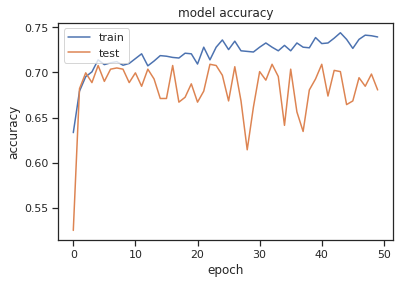

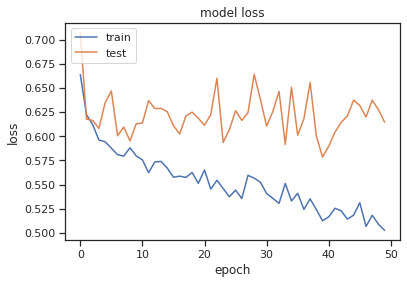

In [223]:
loss_and_accuracy_graph(history)

**Sigmoid + Adam**

In [224]:
model=neural_network_model(sigmoid_activation, adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 0.6328 - accuracy: 0.6762 - val_loss: 0.6145 - val_accuracy: 0.6955
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6227 - accuracy: 0.6731 - val_loss: 0.6117 - val_accuracy: 0.6955
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6670 - val_loss: 0.6100 - val_accuracy: 0.6955
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6217 - accuracy: 0.6675 - val_loss: 0.6027 - val_accuracy: 0.6969
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6005 - accuracy: 0.6808 - val_loss: 0.6015 - val_accuracy: 0.6969
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.6967 - val_loss: 0.6000 - val_accuracy: 0.6996
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.6917 - val_loss: 0.6023 - val_accuracy: 0.7091
Epoch 8/50
47/47 [==

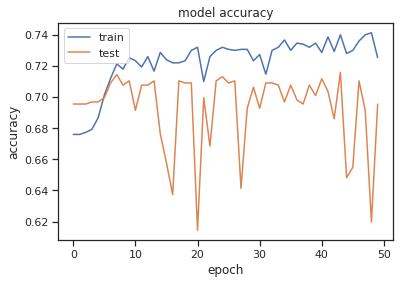

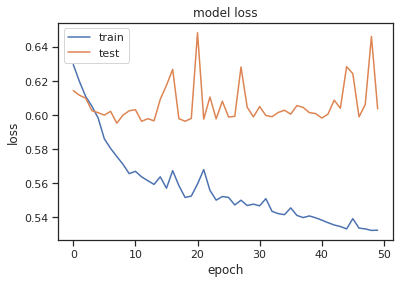

In [225]:
loss_and_accuracy_graph(history)

**Sigmoid + Momentum**

In [226]:
model=neural_network_model(sigmoid_activation,sgd_optimizer)
history =model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 6ms/step - loss: 0.7456 - accuracy: 0.5560 - val_loss: 0.6229 - val_accuracy: 0.6955
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6879 - val_loss: 0.6146 - val_accuracy: 0.6955
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6746 - val_loss: 0.6176 - val_accuracy: 0.6955
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.6901 - val_loss: 0.6277 - val_accuracy: 0.6955
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.6972 - val_loss: 0.6244 - val_accuracy: 0.6955
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6236 - accuracy: 0.6861 - val_loss: 0.6116 - val_accuracy: 0.6955
Epoch 7/50
47/47 [==============================] - 1s 12ms/step - loss: 0.6185 - accuracy: 0.6821 - val_loss: 0.6522 - val_accuracy: 0.7037
Epoch 8/50
47/47 [=

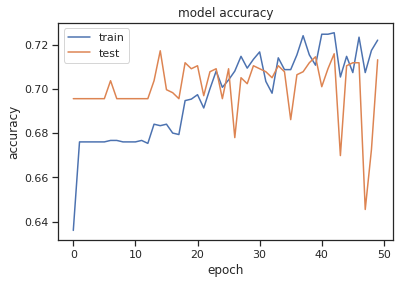

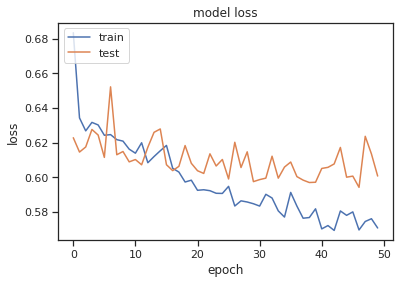

In [227]:
loss_and_accuracy_graph(history)

**Part 2**

Pick the BEST model based on the lowest Cross-Entropy Loss. [My prediction is that it will be ReLU, ADAM], then re-run, but varying the following (10+10 = 20 models)

**Linear + Adam**

In [228]:
model=neural_network_model_with_ten_layers(linear_activation, adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 8ms/step - loss: 6.5295 - accuracy: 0.5620 - val_loss: 0.8624 - val_accuracy: 0.6698
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 2.1977 - accuracy: 0.5260 - val_loss: 0.7858 - val_accuracy: 0.6834
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 1.5156 - accuracy: 0.5494 - val_loss: 0.7035 - val_accuracy: 0.6712
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 1.2992 - accuracy: 0.5793 - val_loss: 0.6606 - val_accuracy: 0.6834
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 1.1066 - accuracy: 0.5712 - val_loss: 0.6286 - val_accuracy: 0.6834
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.8526 - accuracy: 0.6121 - val_loss: 0.6206 - val_accuracy: 0.6793
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.8128 - accuracy: 0.5821 - val_loss: 0.6162 - val_accuracy: 0.6915
Epoch 8/50
47/47 [==

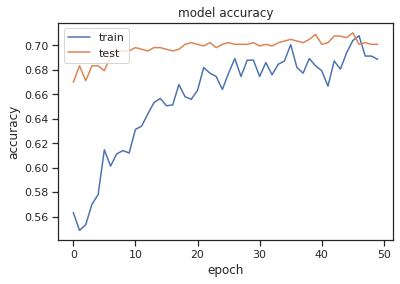

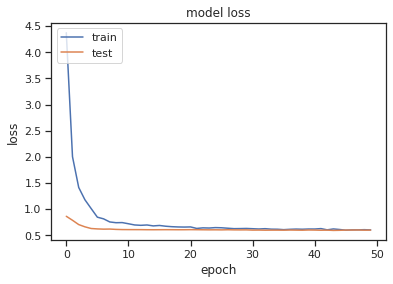

In [229]:
loss_and_accuracy_graph(history)

**Linear + Momentum**

In [230]:
model=neural_network_model_with_ten_layers(linear_activation, sgd_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4668 - val_loss: nan - val_accuracy: 0.3045
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3149 - val_loss: nan - val_accuracy: 0.3045
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3390 - val_loss: nan - val_accuracy: 0.3045
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3230 - val_loss: nan - val_accuracy: 0.3045
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3197 - val_loss: nan - val_accuracy: 0.3045
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3291 - val_loss: nan - val_accuracy: 0.3045
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.3307 - val_loss: nan - val_accuracy: 0.3045
Epoch 8/50
47/47 [==============================] - 0s 3ms/ste

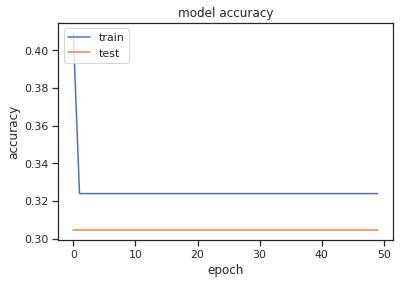

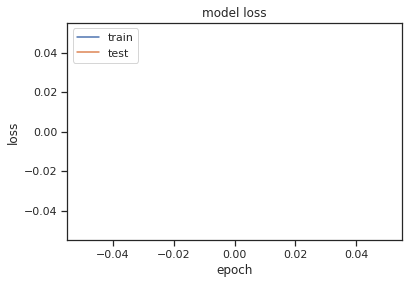

In [231]:
loss_and_accuracy_graph(history)

**RelU + Adam**

In [232]:
model=neural_network_model_with_ten_layers(relu_activation, adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 8ms/step - loss: 0.7504 - accuracy: 0.4505 - val_loss: 0.6819 - val_accuracy: 0.6955
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.6462 - val_loss: 0.6710 - val_accuracy: 0.6955
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6696 - accuracy: 0.6669 - val_loss: 0.6529 - val_accuracy: 0.6955
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6591 - val_loss: 0.6232 - val_accuracy: 0.6955
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6637 - val_loss: 0.6274 - val_accuracy: 0.6955
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6468 - accuracy: 0.6762 - val_loss: 0.6249 - val_accuracy: 0.6955
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6532 - val_loss: 0.6201 - val_accuracy: 0.6955
Epoch 8/50
47/47 [==

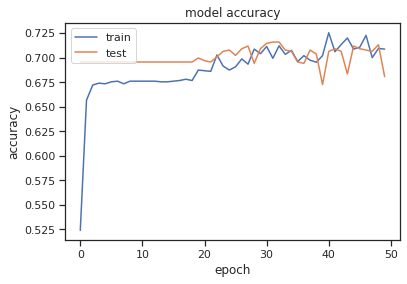

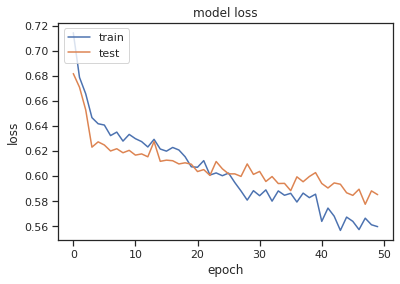

In [233]:
loss_and_accuracy_graph(history)

**RelU + Momentum**

In [234]:
model=neural_network_model_with_ten_layers(relu_activation,sgd_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 2s 7ms/step - loss: 0.6869 - accuracy: 0.6510 - val_loss: 0.6284 - val_accuracy: 0.6955
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.6840 - val_loss: 0.6245 - val_accuracy: 0.6955
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.6629 - val_loss: 0.6235 - val_accuracy: 0.6955
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.6652 - val_loss: 0.6193 - val_accuracy: 0.6955
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.6817 - val_loss: 0.6195 - val_accuracy: 0.6955
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.6711 - val_loss: 0.6173 - val_accuracy: 0.6955
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6790 - val_loss: 0.6176 - val_accuracy: 0.6955
Epoch 8/50
47/47 [==

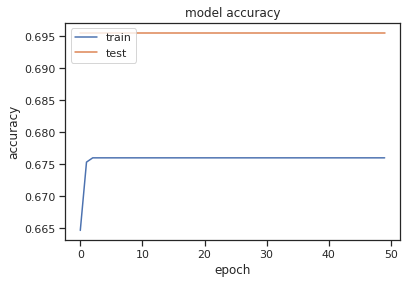

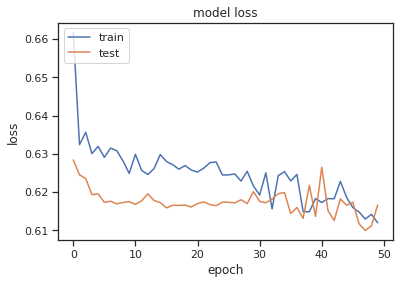

In [235]:
loss_and_accuracy_graph(history)

**Sigmoid + Adam**

In [236]:
model=neural_network_model_with_ten_layers(sigmoid_activation,adam_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 8ms/step - loss: 0.6878 - accuracy: 0.5554 - val_loss: 0.6256 - val_accuracy: 0.6955
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6526 - val_loss: 0.6172 - val_accuracy: 0.6955
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6636 - val_loss: 0.6154 - val_accuracy: 0.6955
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6554 - accuracy: 0.6627 - val_loss: 0.6156 - val_accuracy: 0.6955
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6525 - val_loss: 0.6157 - val_accuracy: 0.6955
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.6566 - val_loss: 0.6157 - val_accuracy: 0.6955
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6414 - accuracy: 0.6657 - val_loss: 0.6152 - val_accuracy: 0.6955
Epoch 8/50
47/47 [==

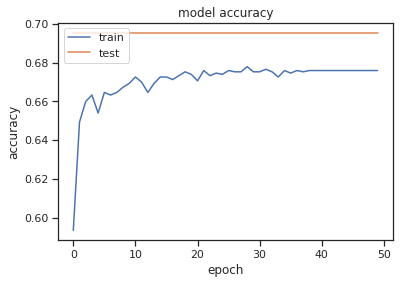

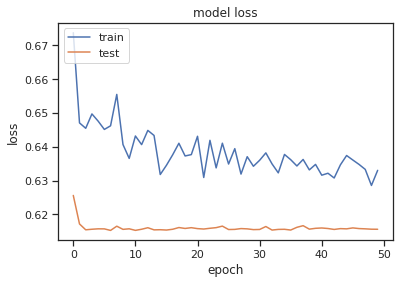

In [237]:
loss_and_accuracy_graph(history)

In [238]:
model=neural_network_model_with_ten_layers(sigmoid_activation,sgd_optimizer)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 17ms/step - loss: 0.6674 - accuracy: 0.6298 - val_loss: 0.6150 - val_accuracy: 0.6955
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6424 - accuracy: 0.6714 - val_loss: 0.6163 - val_accuracy: 0.6955
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6544 - accuracy: 0.6571 - val_loss: 0.6152 - val_accuracy: 0.6955
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6503 - accuracy: 0.6555 - val_loss: 0.6149 - val_accuracy: 0.6955
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.6749 - val_loss: 0.6148 - val_accuracy: 0.6955
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6214 - accuracy: 0.6946 - val_loss: 0.6170 - val_accuracy: 0.6955
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6593 - accuracy: 0.6468 - val_loss: 0.6146 - val_accuracy: 0.6955
Epoch 8/50
47/47 [=

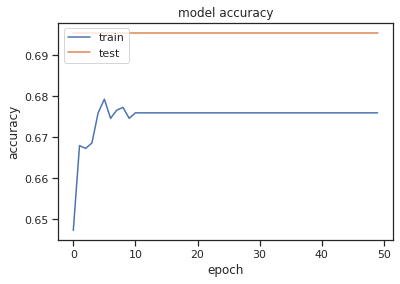

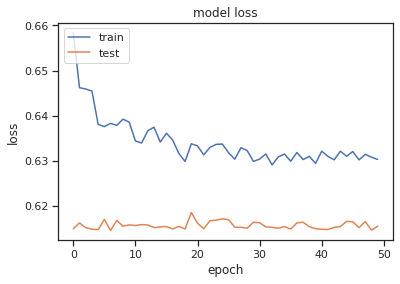

In [239]:
loss_and_accuracy_graph(history)

**Part 3**

Pick the BEST model based on lowest Cross-Entropy Loss, then rerun with those layers, but varying the following (4 * 3 = 12 models

**1.Regularization**

**a. DropOut Method**

In [240]:
model=best_model_extended(relu_activation,adam_optimizer)

In [241]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 1s 8ms/step - loss: 0.6557 - accuracy: 0.6602 - val_loss: 0.6537 - val_accuracy: 0.6955
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6502 - accuracy: 0.6658 - val_loss: 0.6398 - val_accuracy: 0.6955
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6795 - val_loss: 0.6439 - val_accuracy: 0.6955
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6691 - val_loss: 0.6367 - val_accuracy: 0.6955
Epoch 5/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6558 - val_loss: 0.6285 - val_accuracy: 0.6955
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6088 - accuracy: 0.6978 - val_loss: 0.6236 - val_accuracy: 0.6955
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6714 - val_loss: 0.6255 - val_accuracy: 0.6955
Epoch 8/50
47/47 [==

In [242]:
dropout_loss=history

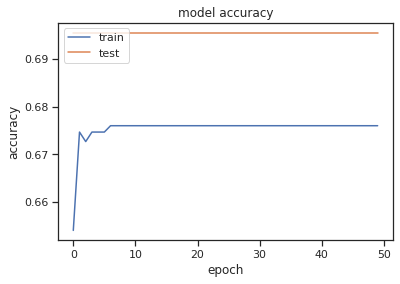

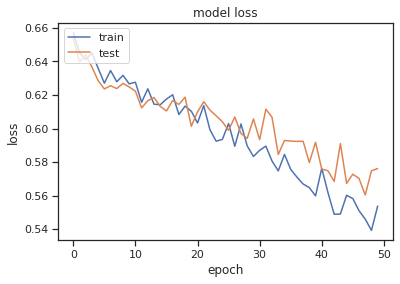

In [243]:
loss_and_accuracy_graph(history)

**b. ShakeOut Method**

In [244]:
model=shakeout_method(relu_activation,adam_optimizer)

In [245]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
47/47 [==============================] - 2s 22ms/step - loss: 0.6318 - accuracy: 0.6716 - val_loss: 0.6249 - val_accuracy: 0.6955
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.6039 - accuracy: 0.6881 - val_loss: 0.6186 - val_accuracy: 0.6955
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.6161 - accuracy: 0.6798 - val_loss: 0.6144 - val_accuracy: 0.6969
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 0.6170 - accuracy: 0.6846 - val_loss: 0.6491 - val_accuracy: 0.6157
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 0.6082 - accuracy: 0.6692 - val_loss: 0.6054 - val_accuracy: 0.6955
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5603 - accuracy: 0.7340 - val_loss: 0.6053 - val_accuracy: 0.7037
Epoch 7/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5717 - accuracy: 0.7145 - val_loss: 0.6079 - val_accuracy: 0.6996
Epoch 8/50
47/47 [=

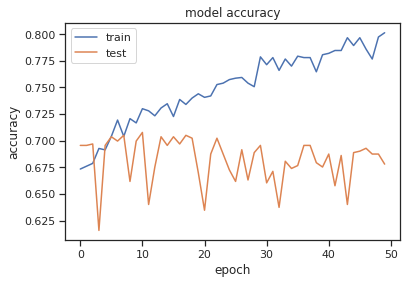

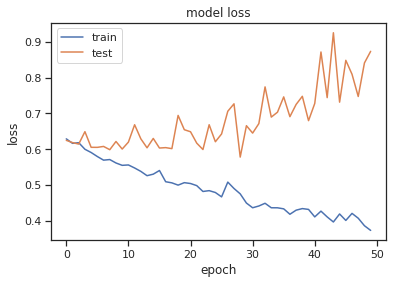

In [246]:
loss_and_accuracy_graph(history)

In [247]:
shakeout_loss=history


**2.Early stopping (after 2, 5 & 10 training epochs)**

In [248]:
def early_stopping_decay(params):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=params)
  return early_stopping   

In [249]:
from keras.callbacks import EarlyStopping
decay_epoch =2

early_stopping=early_stopping_decay(decay_epoch)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=early_stopping)

Epoch 1/50
47/47 [==============================] - 0s 6ms/step - loss: 0.3678 - accuracy: 0.8113 - val_loss: 0.8697 - val_accuracy: 0.6766
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3730 - accuracy: 0.8160 - val_loss: 0.9036 - val_accuracy: 0.6373
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3973 - accuracy: 0.7840 - val_loss: 0.8965 - val_accuracy: 0.6116
Epoch 00003: early stopping


In [250]:
decay_epoch =5

early_stopping=early_stopping_decay(decay_epoch)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=early_stopping)

Epoch 1/50
47/47 [==============================] - 0s 6ms/step - loss: 0.3726 - accuracy: 0.7967 - val_loss: 1.0403 - val_accuracy: 0.6712
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.7953 - val_loss: 0.8356 - val_accuracy: 0.6671
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3624 - accuracy: 0.8080 - val_loss: 0.9283 - val_accuracy: 0.6346
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.3622 - accuracy: 0.8213 - val_loss: 0.9799 - val_accuracy: 0.6549
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8080 - val_loss: 0.9842 - val_accuracy: 0.6563
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3449 - accuracy: 0.8187 - val_loss: 1.0484 - val_accuracy: 0.6725
Epoch 7/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3382 - accuracy: 0.8193 - val_loss: 1.0670 - val_accuracy: 0.6576
Epoch 00007: early s

In [251]:
decay_epoch =10

early_stopping=early_stopping_decay(decay_epoch)
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,callbacks=early_stopping)

Epoch 1/50
47/47 [==============================] - 0s 6ms/step - loss: 0.3558 - accuracy: 0.8240 - val_loss: 1.0333 - val_accuracy: 0.6590
Epoch 2/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3486 - accuracy: 0.8160 - val_loss: 1.0720 - val_accuracy: 0.6631
Epoch 3/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3394 - accuracy: 0.8260 - val_loss: 1.2852 - val_accuracy: 0.6536
Epoch 4/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3582 - accuracy: 0.8227 - val_loss: 1.0382 - val_accuracy: 0.6495
Epoch 5/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.8327 - val_loss: 1.1434 - val_accuracy: 0.6482
Epoch 6/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3168 - accuracy: 0.8367 - val_loss: 1.1302 - val_accuracy: 0.6631
Epoch 7/50
47/47 [==============================] - 0s 5ms/step - loss: 0.3541 - accuracy: 0.8200 - val_loss: 1.3404 - val_accuracy: 0.6360
Epoch 8/50
47/47 [==

**3. Explanation**

The model Relu + Adam working well than all the architecure, if we look at both validation and accuracy graph this model is giving us the good accuracy with minium Entropy loss function

# **Add something "fancy"**
1. Attention-based transformer (not sure how to do this...just see if you can do it following the specifications for the homework).

In [252]:
!git clone https://github.com/pytorch/botorch.git

Cloning into 'botorch'...
remote: Enumerating objects: 957, done.
remote: Counting objects: 100% (957/957), done.
remote: Compressing objects: 100% (381/381), done.
remote: Total 20411 (delta 404), reused 681 (delta 183), pack-reused 19454
Receiving objects: 100% (20411/20411), 19.19 MiB | 22.25 MiB/s, done.
Resolving deltas: 100% (12038/12038), done.


In [253]:
# cd /content/botorch

In [254]:
# !pip install -e .

# **Visualization**
1. Plot bar charts for loss functions associated with each categorical choice above (e.g., DropOut vs. DropConnect vs. ShakeOut vs. Linear vs. ReLU vs. Sigmoid, etc.)
2. Plot line charts for loss functions associated with ordinal choice above (e.g., layers 1-10 of constant size per layer; and 1-10 of constant size across all layers; 3 levels of early stopping)

**1. Plot Bar Charts**

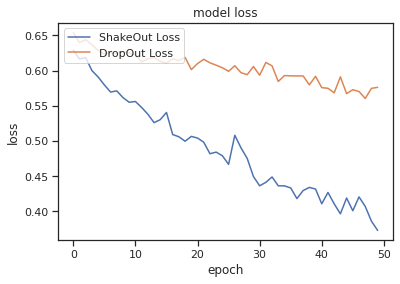

In [255]:
  # summarize history for loss
plt.plot(shakeout_loss.history['loss'])
plt.plot(dropout_loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['ShakeOut Loss', 'DropOut Loss'], loc='upper left')
plt.show()